In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import glob
import numpy as np

In [13]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [25]:
!pip install ultralytics
!pip install roboflow

from roboflow import Roboflow
from ultralytics import YOLO
rf = Roboflow(api_key="9M9eZwZT2EXz4Lmw2SsQ")
project = rf.workspace("utad-dqdey").project("grapevine-disease-detection-vw9ru")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.9, to fix: `pip install ultralytics==8.0.196`


In [ ]:
model = YOLO("yolov8l.yaml").load("yolov8l.pt")
#model = YOLO("yolov8n.yaml").load("yolov8n.pt")
#model = YOLO("yolov5n.yaml").load("yolov5n.pt")

path = r"/content/Grapevine-disease-detection-1/data.yaml"

results = model.train(data = path, epochs = 50)

100%|██████████| 83.7M/83.7M [00:00<00:00, 244MB/s]


Transferred 595/595 items from pretrained weights
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/Drapevine-disease-detection-1/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, s

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 129MB/s]


AMP: checks passed ✅


train: Scanning /content/Drapevine-disease-detection-1/train/labels... 2073 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2073/2073 [00:01<00:00, 1327.11it/s]

train: New cache created: /content/Drapevine-disease-detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Drapevine-disease-detection-1/valid/labels... 199 images, 0 backgrounds, 0 corrupt: 100%|██████████| 199/199 [00:00<00:00, 730.62it/s]

val: New cache created: /content/Drapevine-disease-detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      12.2G      2.304      2.622      1.501        521        640: 100%|██████████| 130/130 [02:03<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]

                   all        199       8385     0.0955      0.119     0.0585     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.4G      2.138      2.205      1.393        784        640: 100%|██████████| 130/130 [01:47<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        199       8385     0.0598      0.098     0.0396       0.02



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.6G       2.15      2.179      1.382        293        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        199       8385      0.304      0.129     0.0905     0.0452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      14.2G      2.145      2.177       1.38        419        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        199       8385      0.131      0.148     0.0863     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        12G       2.11      2.097      1.352        727        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]

                   all        199       8385      0.299       0.14     0.0937     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      13.5G      2.069      2.062      1.331        534        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        199       8385      0.156      0.127     0.0981     0.0515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      14.7G      2.019      1.968      1.312        611        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        199       8385      0.154      0.179      0.115     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      13.7G      2.036      1.991       1.32        406        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        199       8385      0.158      0.187      0.118     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.1G      2.008      1.937      1.298        670        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]

                   all        199       8385      0.314      0.155      0.116     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.6G      1.989      1.906      1.294        392        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        199       8385      0.166       0.19       0.13     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      13.4G      1.958      1.858      1.278        690        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        199       8385      0.191      0.175      0.135     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.3G      1.959      1.865      1.282        588        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        199       8385      0.159      0.195      0.133     0.0671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.6G      1.931      1.828      1.267        627        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        199       8385      0.194      0.199      0.143     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.5G      1.934       1.81       1.26        662        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        199       8385      0.349      0.185      0.141      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.1G      1.916      1.779      1.256        562        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        199       8385      0.365      0.201      0.151     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.4G      1.927      1.813      1.262        470        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        199       8385      0.191      0.176      0.139     0.0731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.9G      1.899      1.754      1.253        437        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        199       8385      0.363      0.195      0.143     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.8G      1.894      1.745      1.252        399        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        199       8385       0.38      0.189      0.153     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.9G      1.891      1.736      1.244        609        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        199       8385      0.368      0.186      0.146      0.077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.4G      1.875      1.708      1.236        460        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        199       8385      0.374      0.213      0.205      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      14.4G      1.853       1.69      1.233        399        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        199       8385      0.376      0.213      0.184     0.0961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.6G      1.855      1.696      1.235        340        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        199       8385      0.188      0.204      0.148     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.1G      1.844      1.666      1.221        670        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]

                   all        199       8385      0.371      0.203       0.15     0.0791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.7G      1.852      1.662      1.229        464        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        199       8385      0.385      0.205      0.163     0.0856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.4G      1.821      1.663      1.227        309        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        199       8385      0.372      0.212      0.158     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.6G      1.814      1.629      1.217        448        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        199       8385      0.388      0.208      0.162     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.4G      1.816      1.608      1.215        523        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        199       8385      0.375      0.211       0.17     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.9G      1.807      1.602      1.216        665        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        199       8385      0.377        0.2      0.163     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        13G      1.804      1.575      1.205        569        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        199       8385      0.394      0.212      0.172     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.5G      1.779      1.558      1.198        477        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        199       8385      0.388      0.219      0.168     0.0868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        13G      1.773      1.547      1.198        392        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        199       8385      0.371      0.239      0.172     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      13.9G      1.758       1.51      1.192        446        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        199       8385      0.377      0.223      0.167     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.7G      1.758      1.526      1.186        383        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        199       8385      0.404      0.211      0.177     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      14.2G      1.723      1.458      1.174        556        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        199       8385      0.375       0.22      0.171     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.4G      1.731      1.469      1.178        581        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        199       8385      0.395      0.222      0.174     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.1G      1.732      1.465      1.183        451        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        199       8385      0.402      0.228      0.184     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.7G      1.716      1.441      1.176        752        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        199       8385      0.392      0.226      0.178     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        12G       1.71      1.416      1.168        667        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        199       8385      0.411      0.236      0.176     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        13G        1.7      1.414      1.168        437        640: 100%|██████████| 130/130 [01:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        199       8385      0.383      0.215      0.168     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.9G      1.692      1.382      1.164        492        640: 100%|██████████| 130/130 [01:47<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        199       8385      0.381      0.207      0.167     0.0873


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.2G      1.671      1.388      1.209        295        640: 100%|██████████| 130/130 [01:52<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        199       8385      0.595      0.215      0.192      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        11G      1.659      1.358      1.191        500        640: 100%|██████████| 130/130 [01:44<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]

                   all        199       8385      0.581      0.201      0.184     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.1G      1.647      1.329      1.184        444        640: 100%|██████████| 130/130 [01:44<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        199       8385      0.424      0.207      0.198      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.1G      1.637      1.299      1.184        271        640: 100%|██████████| 130/130 [01:44<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        199       8385      0.582      0.208      0.181     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.7G      1.624      1.299      1.186        275        640: 100%|██████████| 130/130 [01:44<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        199       8385      0.586      0.206      0.184     0.0984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.2G      1.616      1.276      1.176        207        640: 100%|██████████| 130/130 [01:44<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        199       8385      0.581      0.201      0.182     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.1G      1.606      1.241      1.171        467        640: 100%|██████████| 130/130 [01:44<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        199       8385      0.424      0.214      0.184     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.3G      1.593      1.223      1.163        358        640: 100%|██████████| 130/130 [01:44<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        199       8385      0.589      0.206      0.179     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.1G      1.584      1.212      1.165        288        640: 100%|██████████| 130/130 [01:44<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        199       8385      0.599      0.204      0.187        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.3G      1.579      1.185      1.152        277        640: 100%|██████████| 130/130 [01:44<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        199       8385      0.585      0.215      0.181     0.0985



50 epochs completed in 1.658 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:25<00:00,  3.64s/it]


                   all        199       8385      0.424      0.207      0.198      0.108
             ESCA leaf        199        585      0.407      0.381      0.321      0.171
               FD leaf        199       2572      0.432      0.275      0.283      0.153
                 autre        199         11          1          0      0.106      0.065
      confounding leaf        199       5007      0.415      0.331      0.293      0.152
  facteur confondant -        199        191      0.289      0.251      0.186      0.106
     symptomatic bunch        199         19          0          0          0          0
Speed: 0.3ms preprocess, 17.8ms inference, 0.0ms loss, 26.5ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model_best = YOLO("/content/best_yolov8n.pt")
dir_test_images = "/content/Grapevine-disease-detection-1/test/images"
test = model_best.predict(source = dir_test_images, conf = 0.55, save = True, save_txt = True)

dir_predicted_images = "/content/runs/detect/predict/*.jpg"
tested_images_paths = []

for image in sorted(glob.iglob(dir_predicted_images)):
  tested_images_paths.append(image)

#for image in tested_images_paths:
#  img = cv2.imread(image)
#  cv2_imshow(img)

In [ ]:
model_best = YOLO("/content/best_yolov5n.pt")
dir_test_images = "/content/Grapevine-disease-detection-1/test/images"
test = model_best.predict(source = dir_test_images, conf = 0.55, save = True, save_txt = True)

dir_predicted_images = "/content/runs/detect/predict/*.jpg"
tested_images_paths = []

for image in sorted(glob.iglob(dir_predicted_images)):
  tested_images_paths.append(image)

#for image in tested_images_paths:
#  img = cv2.imread(image)
#  cv2_imshow(img)

In [26]:
model_best = YOLO("/content/best_yolov8l.pt")
dir_test_images = "/content/Grapevine-disease-detection-1/test/images"
test = model_best.predict(source = dir_test_images, conf = 0.55, save = True, save_txt = True)

dir_predicted_images = "/content/runs/detect/predict/*.jpg"
tested_images_paths = []

for image in sorted(glob.iglob(dir_predicted_images)):
  tested_images_paths.append(image)

#for image in tested_images_paths:
#  img = cv2.imread(image)
#  cv2_imshow(img)


image 1/100 /content/Grapevine-disease-detection-1/test/images/im_00000-2-.rf.688b963eb03b57cee8fd3b56c069f1ce.jpg: 640x640 (no detections), 58.2ms
image 2/100 /content/Grapevine-disease-detection-1/test/images/im_00002_jpg.rf.98638918fea413dd2ad50fd2de80a725.jpg: 640x640 (no detections), 47.9ms
image 3/100 /content/Grapevine-disease-detection-1/test/images/im_00004_jpg.rf.f602e6916b4982150b6ecf525ece8337.jpg: 640x640 (no detections), 47.8ms
image 4/100 /content/Grapevine-disease-detection-1/test/images/im_00006_jpg.rf.226409928f0b38862e896c81302baf6c.jpg: 640x640 1 FD leaf, 3 confounding leafs, 42.2ms
image 5/100 /content/Grapevine-disease-detection-1/test/images/im_00007_jpg.rf.96ec18a2b5d2caaab580e4d99579d36e.jpg: 640x640 12 confounding leafs, 33.7ms
image 6/100 /content/Grapevine-disease-detection-1/test/images/im_00009.rf.f82d97adb041425bbfb6dd04acbe6bf7.jpg: 640x640 10 confounding leafs, 33.9ms
image 7/100 /content/Grapevine-disease-detection-1/test/images/im_00011_jpg.rf.66ff23

In [27]:
from matplotlib import pyplot as plot

thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
threshold = 0.5
count_list = []

for threshold in thresholds:

  results = model_best("/content/Grapevine-disease-detection-1/test/images/im_00006_jpg.rf.226409928f0b38862e896c81302baf6c.jpg", conf = threshold)
  class_names = ["ESCA", "FD", "autre", "confouding leaf", "facteur confondant", "symptomatic bunch"]

  for result in results:
    count = 0
    num_box = result.boxes
    cls = num_box.cls.tolist()

    print(cls)
    for class_index in cls:
        class_name = class_names[int(class_index)]
        print("Class:", class_name)
        if class_name == "FD":
          count = count + 1
    print("Number of FD:", count)
    count_list.append(count)

count_list


image 1/1 /content/Grapevine-disease-detection-1/test/images/im_00006_jpg.rf.226409928f0b38862e896c81302baf6c.jpg: 640x640 1 FD leaf, 4 confounding leafs, 63.0ms
Speed: 2.0ms preprocess, 63.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
61 labels saved to runs/detect/predict5/labels
[3.0, 3.0, 1.0, 3.0, 3.0]
Class: confouding leaf
Class: confouding leaf
Class: FD
Class: confouding leaf
Class: confouding leaf
Number of FD: 1

image 1/1 /content/Grapevine-disease-detection-1/test/images/im_00006_jpg.rf.226409928f0b38862e896c81302baf6c.jpg: 640x640 1 FD leaf, 3 confounding leafs, 62.7ms
Speed: 1.4ms preprocess, 62.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
61 labels saved to runs/detect/predict5/labels
[3.0, 3.0, 1.0, 3.0]
Class: confouding leaf
Class: confouding leaf
Class: FD
Class: confouding leaf
Number of FD: 1

image 1/1 /content/Grapevine-disease-detection-1/

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Text(0, 0.5, 'Number of FD leaves detected')

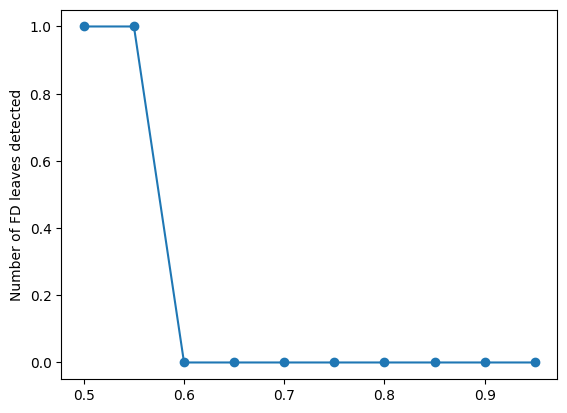

In [28]:
plot.plot(thresholds, count_list, marker='o')

plot.ylabel("Number of FD leaves detected")

In [31]:
!yolo task=detect mode=val split=test model="/content/best_yolov8l.pt" data="/content/Grapevine-disease-detection-1/data.yaml"

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/Grapevine-disease-detection-1/test/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:27<00:00,  3.95s/it]
                   all        100       4033       0.39      0.224      0.177      0.102
             ESCA leaf        100        307      0.249      0.277       0.19      0.103
               FD leaf        100        881      0.327      0.268      0.197       0.11
                 autre        100          4          1          0          0          0
      confounding leaf        100       2612      0.407      0.427      0.344      0.181
  facteur confondant -        100        214      0.355       0.37      0.334      0.218
     symptomatic bunch        

In [ ]:
!yolo task=detect mode=val split=test model="/content/best_yolov8n.pt" data="/content/Grapevine-disease-detection-1/data.yaml"

In [ ]:
!yolo task=detect mode=val split=test model="/content/best_yolov5n.pt" data="/content/Grapevine-disease-detection-1/data.yaml"

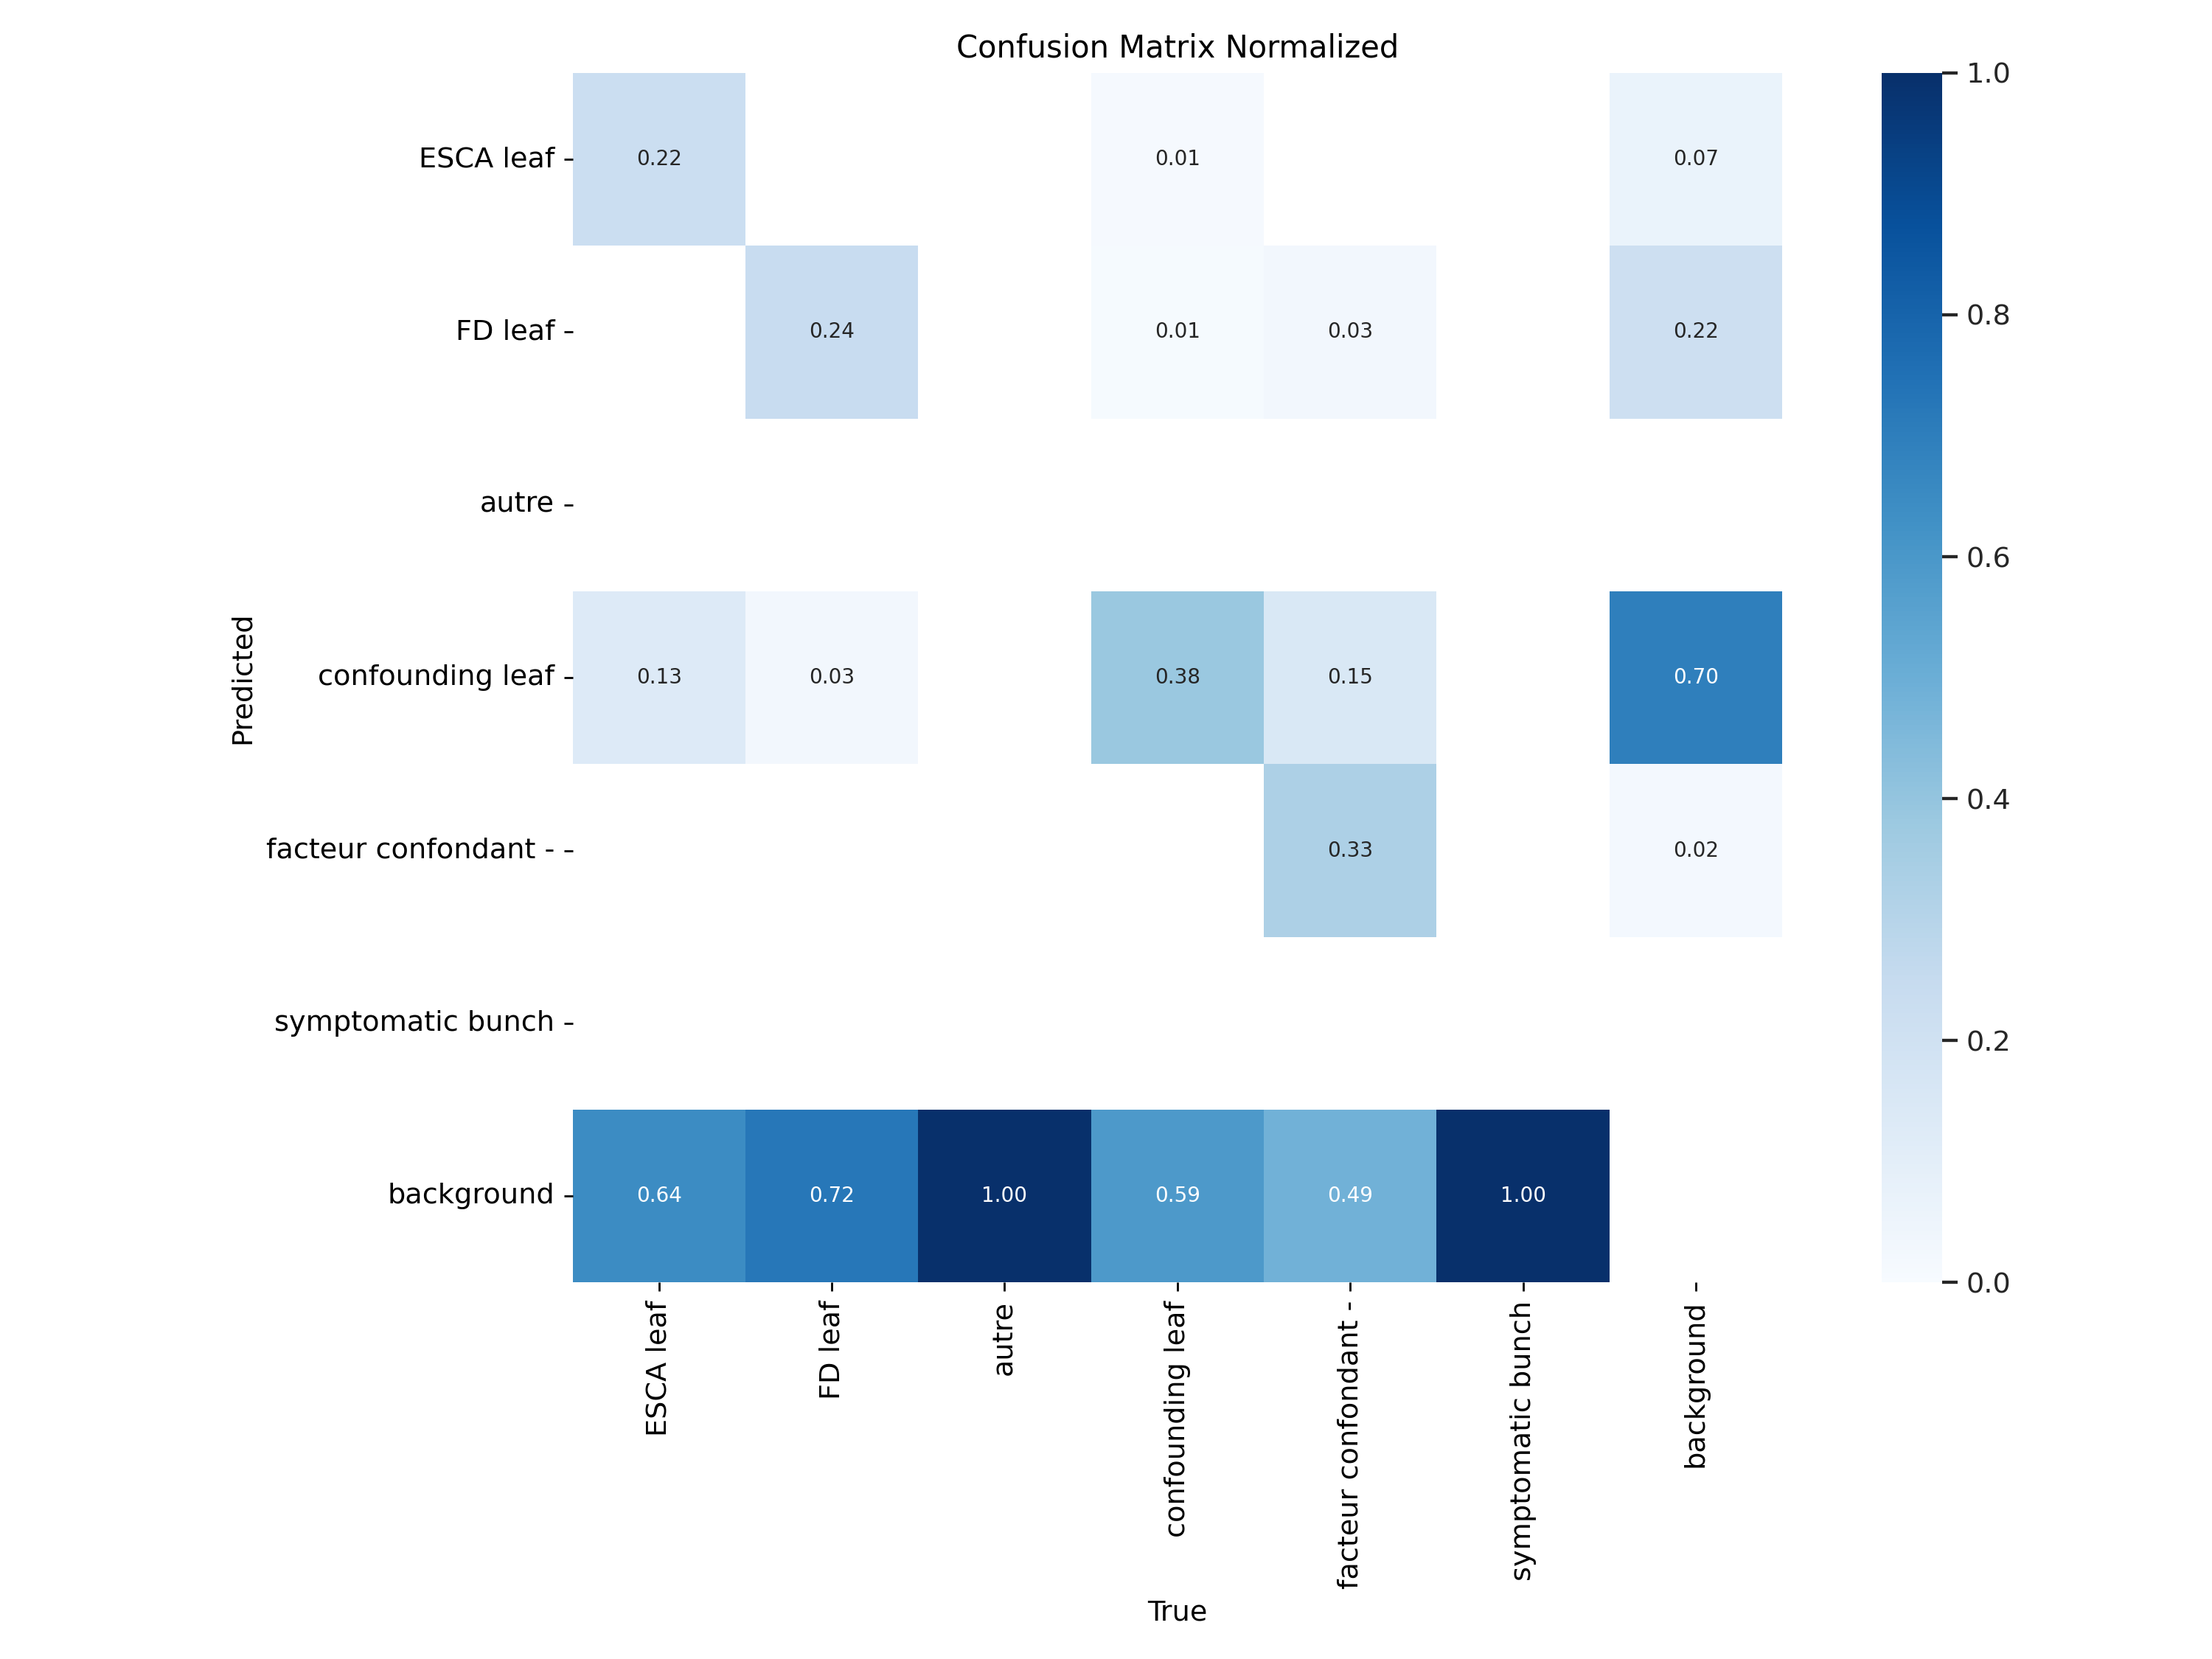

In [32]:
confusion_matrix_img = cv2.imread("/content/runs/detect/val4/confusion_matrix_normalized.png", cv2.COLOR_BGR2RGB)
cv2_imshow(confusion_matrix_img)